### Visualization using Seaborne
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib’s defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.
- Matplotlib’s API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
from seaborn import FacetGrid, load_dataset


In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

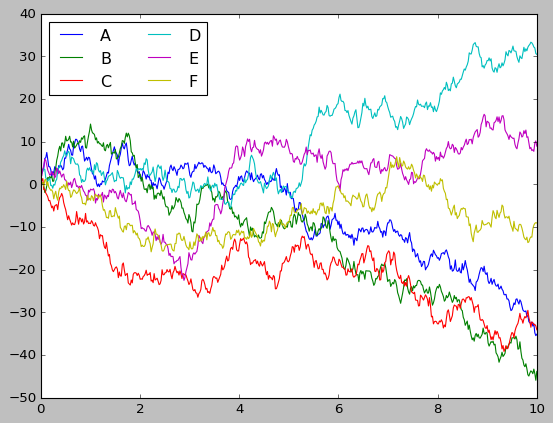

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

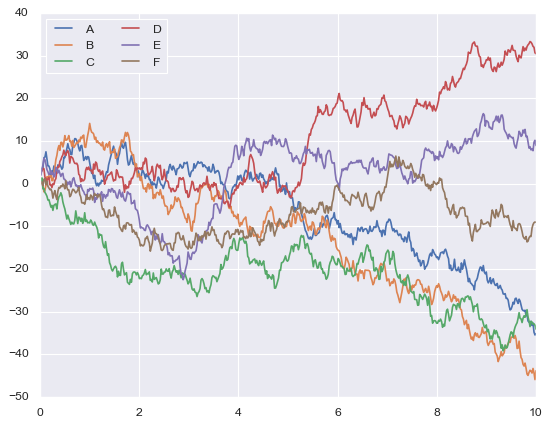

In [4]:
# same plotting code as above!
sns.set_theme()
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### Exploring Seaborn Plots
The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

### Histograms, KDE, and densities
Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables

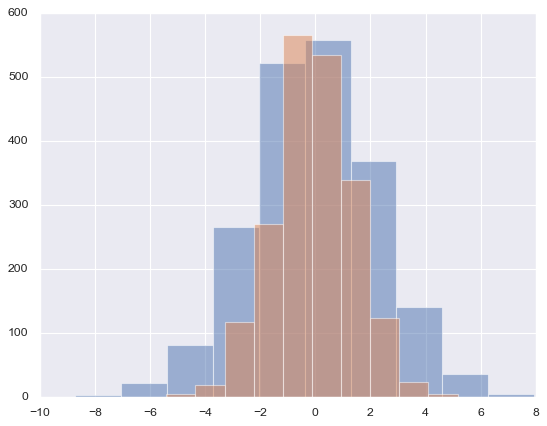

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

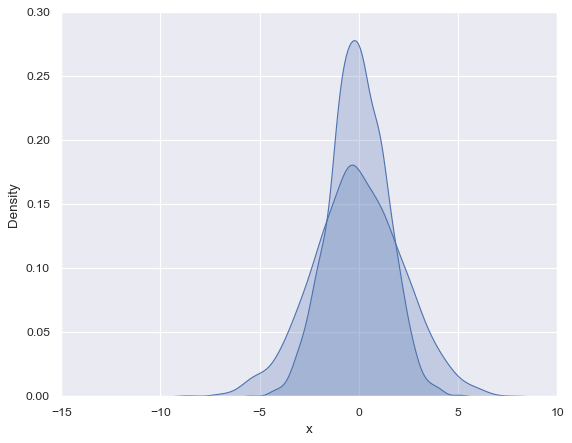

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_28664\923662334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_28664\923662334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


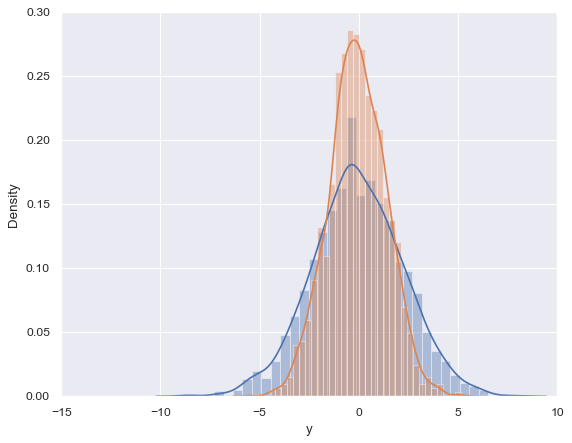

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y'])

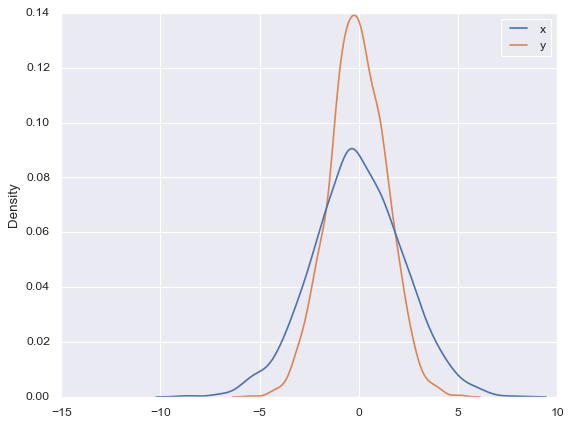

In [8]:
sns.kdeplot(data);

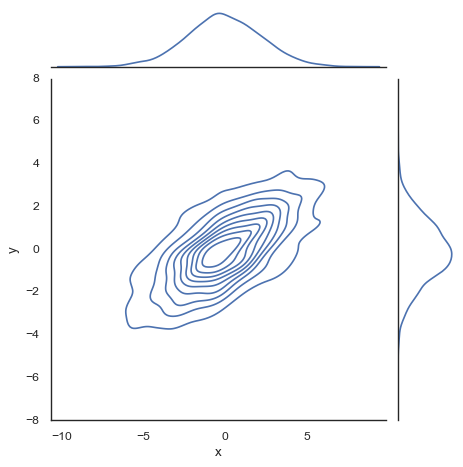

In [9]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

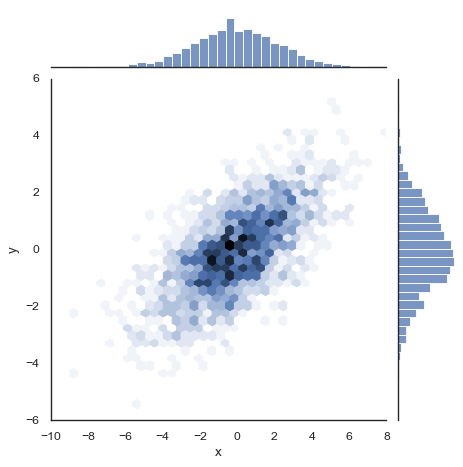

In [12]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

### Pair plots
When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you’d like to plot all pairs of values against each other.

We’ll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species


In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\HomePC\Documents\DataScience\Pydata\venv\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


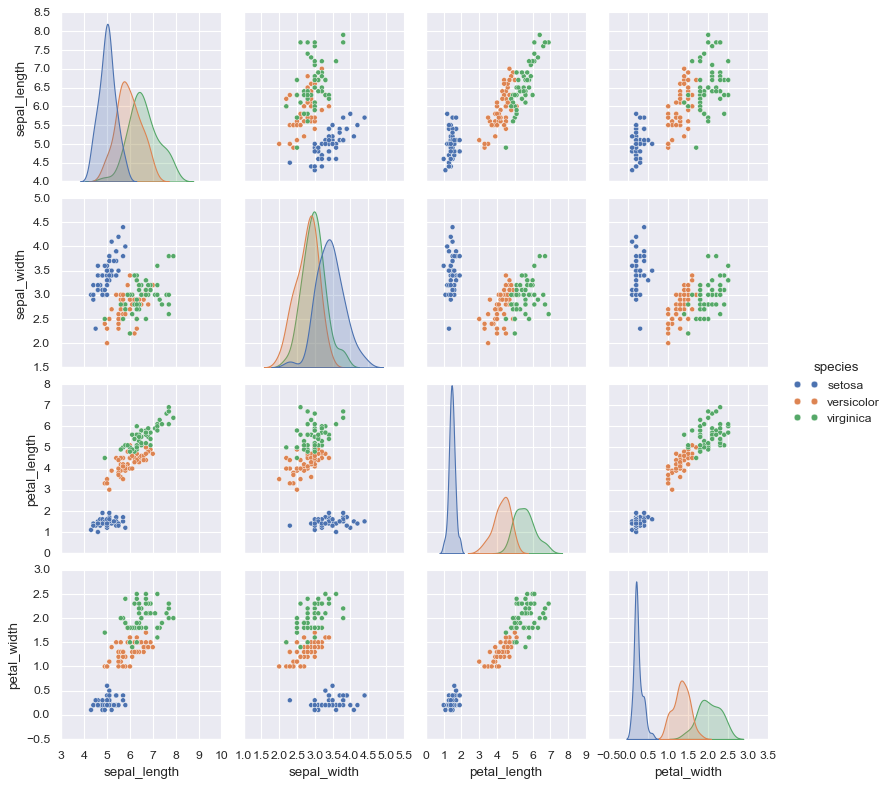

In [ ]:
sns.pairplot(iris, hue='species', size=2.5)

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn’s FacetGrid makes this extremely simple. We’ll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


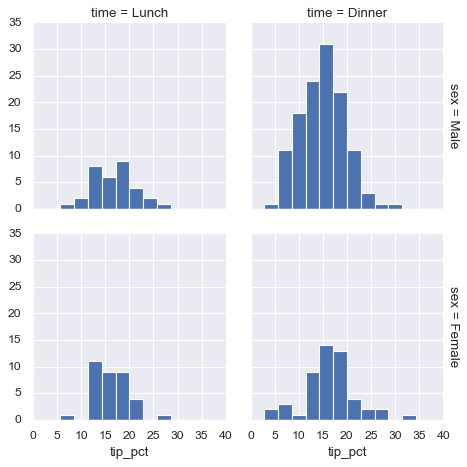

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

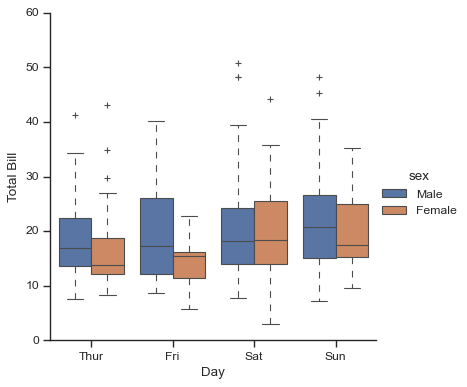

In [ ]:
# factor  plots
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

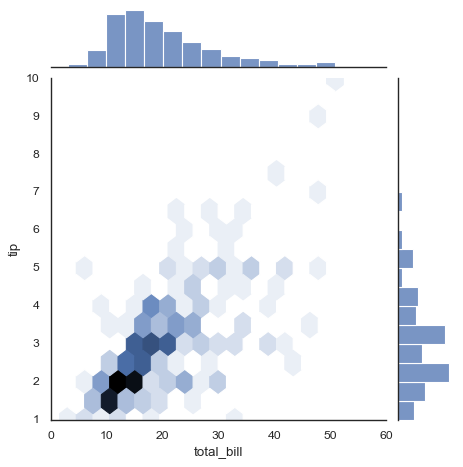

In [ ]:
# Joint distributions
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

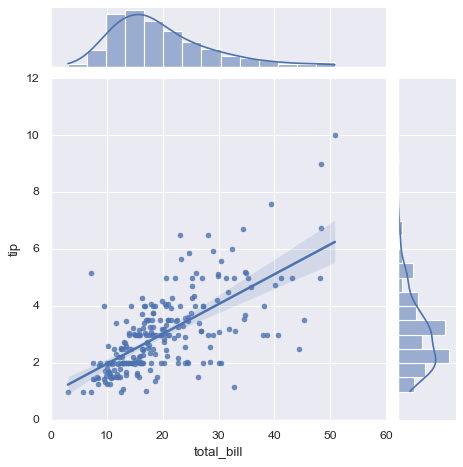

In [ ]:
sns.jointplot(x="total_bill", y="tip", data = tips, kind='reg');

### Bar plots


In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


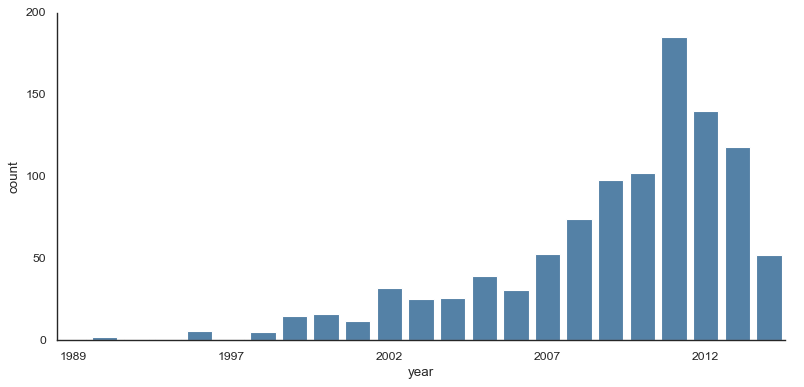

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

#### Exploring Marathon Finishing Times

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [ ]:
# Convert time

import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
# Columns giving time in seconds
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


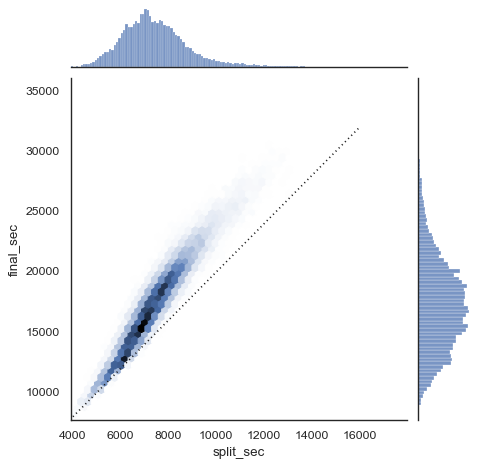

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [ ]:
# Split times
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


C:\Users\HomePC\AppData\Local\Temp\ipykernel_30860\1395287048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['split_frac'], kde=False);


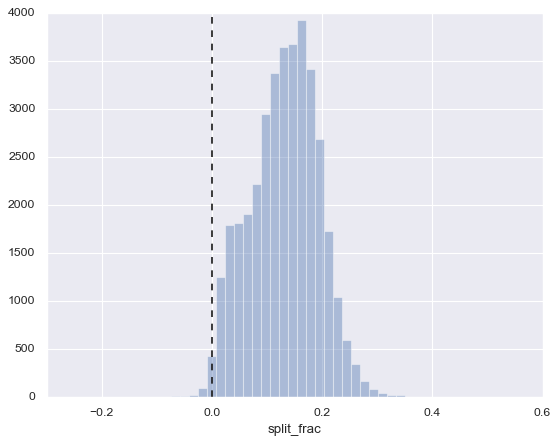

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0)

251

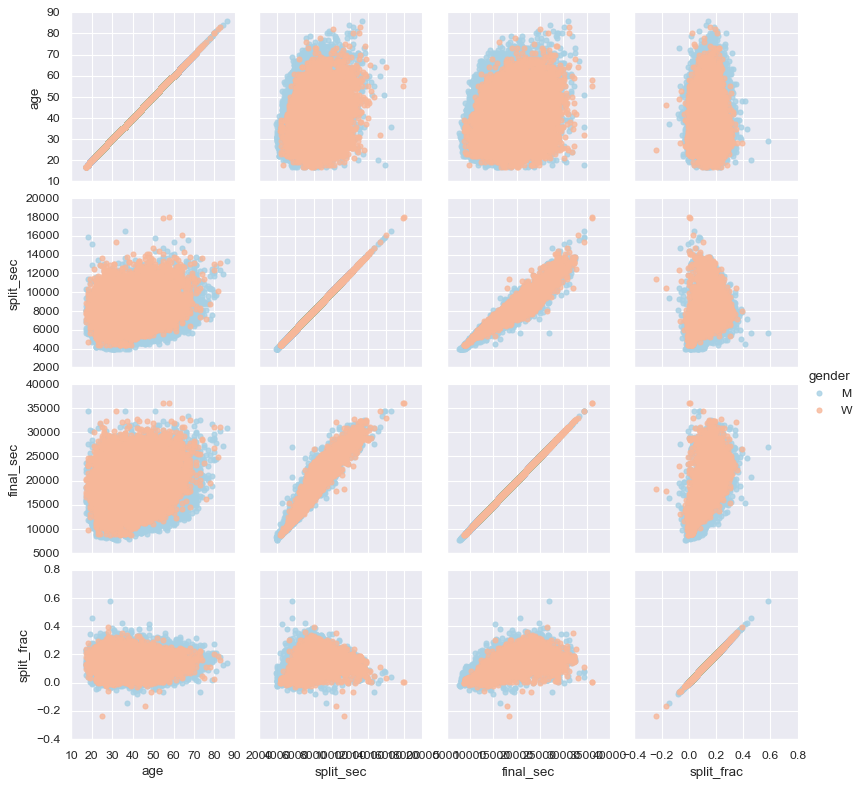

In [ ]:
# corelation between split times and other variables
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_30860\1793497472.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
C:\Users\HomePC\AppData\Local\Temp\ipykernel_30860\1793497472.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)


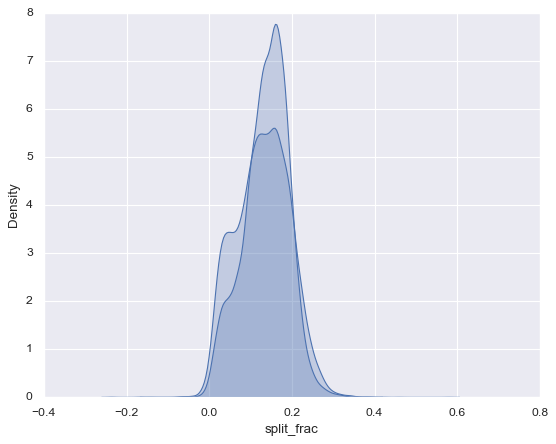

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

C:\Users\HomePC\AppData\Local\Temp\ipykernel_30860\2937393740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="split_frac", data=data,


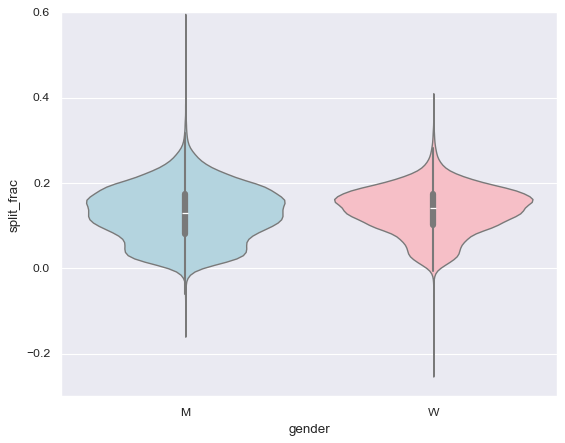

In [ ]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


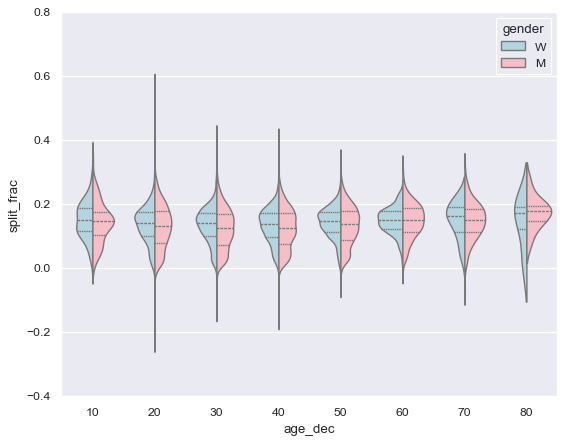

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [ ]:
(data.age > 80).sum()

np.int64(7)

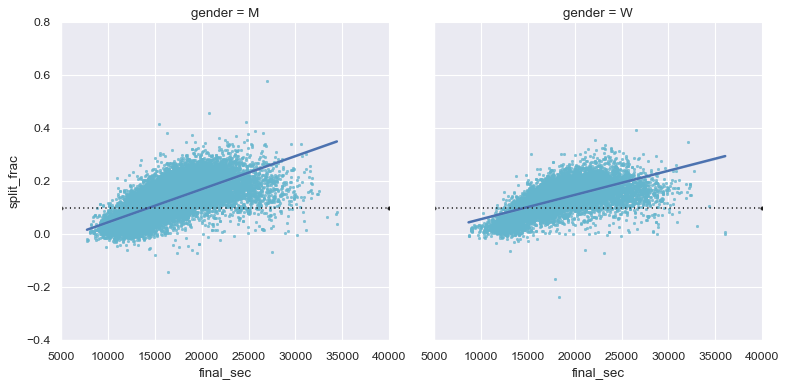

In [ ]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")